In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [3]:
# Generate synthetic dataset
data = {
    "Feature1": np.random.normal(50, 10, 200),
    "Feature2": np.random.normal(30, 5, 200)
}

In [4]:
# Introduce anomalies
data["Feature1"][::20] = np.random.normal(100, 5, 10)
data["Feature2"][::20] = np.random.normal(10, 2, 10)

df = pd.DataFrame(data)

In [5]:
# Standardizing the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [6]:
# Applying Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df["Anomaly"] = iso_forest.fit_predict(df_scaled)

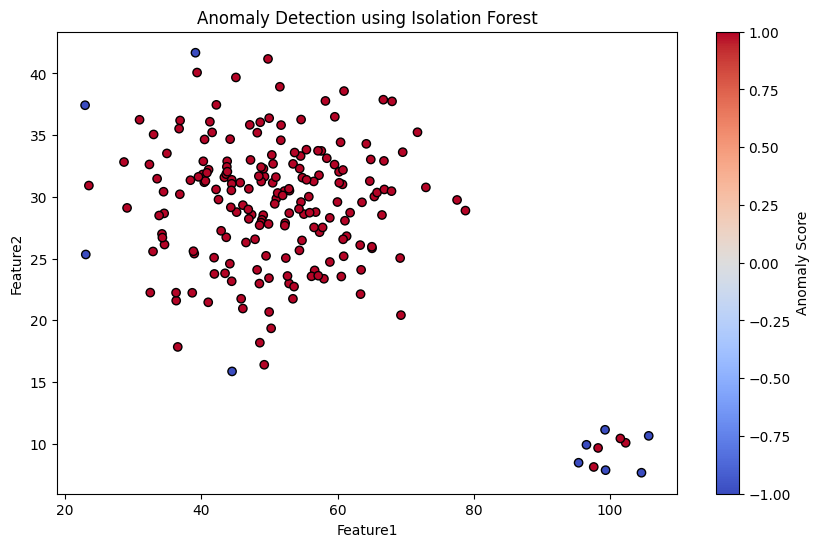

In [7]:
# Visualizing the anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df["Feature1"], df["Feature2"], c=df["Anomaly"], cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Anomaly Detection using Isolation Forest")
plt.colorbar(label="Anomaly Score")
plt.show()